<a href="https://colab.research.google.com/github/lmcanavals/algorithmic_complexity/blob/main/notebooks/bn_bellman_ford.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import math

In [11]:
def relax(G, u, v):
  g_u = G.nodes[u]["dist"]
  g_v = G.nodes[v]["dist"]
  w_uv = G.edges[u, v]["weight"]
  if g_u + w_uv < g_v:
    G.nodes[v]["dist"] = g_u + w_uv
    G.nodes[v]["path"] = u
    return True
  return False

def bellmanFord(G, s):
  n = G.number_of_nodes()
  for u in G.nodes:
    G.nodes[u]["dist"] = math.inf
    G.nodes[u]["path"] = -1

  G.nodes[s]["dist"] = 0

  for _ in range(n - 1):
    for u, v in G.edges:
      relax(G, u, v)

  for u, v in G.edges:
    if relax(G, u, v):
      return False
  return True

In [12]:
# File: [nodo_u] [nodo_v] [peso_uv]
# Ejemplo:
# 2 3 -10
# Significa:  Del Nodo 2 al nodo 3, pesa -10
%%file 1.wal
0 1 1
0 2 10
1 3 2
2 3 -10
3 4 3

Overwriting 1.wal


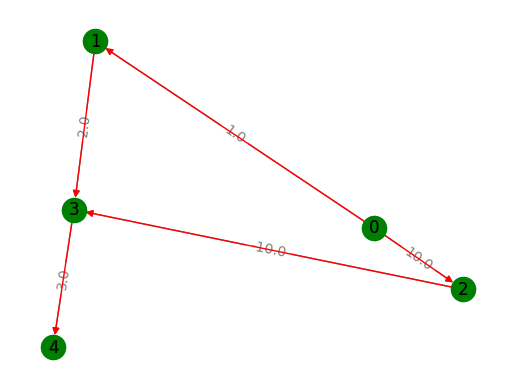

In [14]:
G = nx.read_weighted_edgelist("1.wal", create_using=nx.DiGraph, nodetype=int)
#gs.nx2gv(G, weighted=True)

# Mostrar el grafo [rezc]
import matplotlib.pyplot as plt

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos,alpha=0.5)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels,alpha=0.5)
nx.draw(G, pos=pos, with_labels=True, node_color='green',node_size=300, edge_color='red', alpha=1)
plt.show()


In [15]:
bellmanFord(G, 0)

True

In [16]:
for u in G.nodes:
  print(f"{G.nodes[u]['path']:2} -> {u}: {G.nodes[u]['dist']}")

-1 -> 0: 0
 0 -> 1: 1.0
 0 -> 2: 10.0
 2 -> 3: 0.0
 3 -> 4: 3.0


In [17]:
%%file 2.wal
0 1 99
0 4 -99
1 2 15
2 1 -42
2 3 10

Overwriting 2.wal


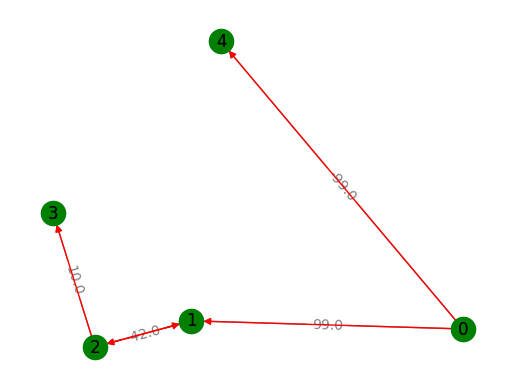

In [20]:
G = nx.read_weighted_edgelist("2.wal", create_using=nx.DiGraph, nodetype=int)
#gs.nx2gv(G, weighted=True)

# Mostrar el grafo [rezc]
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos,alpha=0.5)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels,alpha=0.5)
nx.draw(G, pos=pos, with_labels=True, node_color='green',node_size=300, edge_color='red', alpha=1)
plt.show()

In [21]:
bellmanFord(G, 0)

False

In [22]:
for u in G.nodes:
  print(f"{G.nodes[u]['path']:2} -> {u}: {G.nodes[u]['dist']}")

-1 -> 0: 0
 2 -> 1: -9.0
 0 -> 4: -99.0
 1 -> 2: 6.0
 2 -> 3: 43.0
